In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.font_manager as fm

# 데이터 전처리

In [4]:
df = pd.read_csv('D:\data\소비에측/train.csv')

In [5]:
df

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,1956,Graduation,Together,46097.0,0,1,31-03-2013,11,5,...,6,4,0,0,0,0,0,0,0,241
1104,1104,1986,Graduation,Married,23477.0,1,0,21-10-2013,39,3,...,4,8,0,0,0,0,0,0,0,147
1105,1105,1975,Master,Married,37368.0,1,0,16-12-2013,4,1,...,2,6,1,0,0,0,0,0,0,30
1106,1106,1974,Graduation,Divorced,53034.0,1,1,30-05-2013,30,8,...,7,8,0,0,0,0,0,0,0,447


In [6]:
df.isnull().sum()  # 결측값은 존재 하지 않음

id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
dtype: int64

In [7]:
df['target'] = list(map(int,df['target']))

In [8]:
df['Income'] = list(map(int,df['Income']))

In [9]:
df

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,1956,Graduation,Together,46097,0,1,31-03-2013,11,5,...,6,4,0,0,0,0,0,0,0,241
1104,1104,1986,Graduation,Married,23477,1,0,21-10-2013,39,3,...,4,8,0,0,0,0,0,0,0,147
1105,1105,1975,Master,Married,37368,1,0,16-12-2013,4,1,...,2,6,1,0,0,0,0,0,0,30
1106,1106,1974,Graduation,Divorced,53034,1,1,30-05-2013,30,8,...,7,8,0,0,0,0,0,0,0,447


In [10]:
df1 = df.copy()

In [11]:
df1['Dt_Customer']

0       21-01-2013
1       24-05-2014
2       08-04-2013
3       29-03-2014
4       10-06-2014
           ...    
1103    31-03-2013
1104    21-10-2013
1105    16-12-2013
1106    30-05-2013
1107    29-10-2012
Name: Dt_Customer, Length: 1108, dtype: object

In [12]:
dat = df1['Dt_Customer'].apply(lambda x : x.split('-')) 

In [13]:
### 날짜별로 얼마나 분포가 되어 있는지 확인하기 위해서 

In [14]:
dat

0       [21, 01, 2013]
1       [24, 05, 2014]
2       [08, 04, 2013]
3       [29, 03, 2014]
4       [10, 06, 2014]
             ...      
1103    [31, 03, 2013]
1104    [21, 10, 2013]
1105    [16, 12, 2013]
1106    [30, 05, 2013]
1107    [29, 10, 2012]
Name: Dt_Customer, Length: 1108, dtype: object

In [15]:
dat= list(dat)
day = []
for i in dat:
    day.append(i[0])
month = []
for i in dat:
    month.append(i[1])
year = []
for i in dat :
    year.append(i[2])
# 년,월,일을 분류

In [16]:
df1['year'] = year
df1['month'] = month
df1['day'] = day

In [17]:
df1 = df1.drop('Dt_Customer',axis = 1)

In [19]:
df1[(df1['AcceptedCmp1'] == 1) & (df1['AcceptedCmp2'] == 1 )]  # 겹치는게 존재 

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
94,94,1958,PhD,Together,84460,0,0,80,0,9,...,1,1,1,1,0,1,523,2013,01,04
407,407,1959,Graduation,Together,87771,0,1,61,1,5,...,1,1,1,1,0,1,1957,2013,05,22
641,641,1977,PhD,Married,61996,0,1,27,3,6,...,1,0,1,1,0,1,1230,2013,01,31
712,712,1954,Graduation,Divorced,85683,0,0,6,1,2,...,1,1,1,1,0,1,1789,2014,03,21
721,721,1990,Master,Single,91172,0,0,94,0,4,...,0,1,1,1,0,1,1092,2013,03,27
983,983,1961,PhD,Single,84865,0,0,1,1,2,...,1,1,1,1,0,1,1688,2013,05,09
1035,1035,1956,Graduation,Single,91249,0,0,84,0,7,...,1,1,1,1,0,1,1676,2012,10,20
1040,1040,1958,Graduation,Married,48192,0,0,76,3,2,...,1,0,1,1,0,1,1526,2013,04,06


In [20]:
df1[(df1['AcceptedCmp1'] == 0) & (df1['AcceptedCmp2'] == 0 ) &(df1['AcceptedCmp3'] == 0 )&(df1['AcceptedCmp5'] == 0 )&(df1['AcceptedCmp4'] == 0)&(df1['Response'] == 0 )  ] 
df1[(df1['AcceptedCmp1'] == 1) & (df1['AcceptedCmp2'] == 1 ) &(df1['AcceptedCmp3'] == 1 )&(df1['AcceptedCmp5'] == 1 )&(df1['AcceptedCmp4'] == 1 )&(df1['Response'] == 1 )   ] 

# 모두 겹치는건 없음 1234겹치는건없음 1235 겹치는건 있음 
# accpted에 반응 안한 사람 799명

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day


6가지 경우를 봐야함 response는 accept 6 봐야함 

날짜의 기준을 2015으로 기준으로 생각을 하고 2015년에서 태어난 년도를 뺴서 나이를 구함

In [21]:
df1['age'] = 2015-df1['Year_Birth']

In [20]:
df1 = df1.drop('Year_Birth',axis = 1)

In [21]:
df1

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
0,0,Master,Together,46014,1,1,21,10,7,1,...,0,0,0,0,0,541,2013,01,21,41
1,1,Graduation,Single,76624,0,1,68,1,5,10,...,0,0,0,0,0,899,2014,05,24,53
2,2,Graduation,Married,75903,0,1,50,2,6,6,...,0,0,0,0,0,901,2013,04,08,64
3,3,Basic,Married,18393,1,0,2,2,3,0,...,0,0,0,0,0,50,2014,03,29,41
4,4,PhD,Together,64014,2,1,56,7,8,2,...,0,1,0,0,0,444,2014,06,10,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,Graduation,Together,46097,0,1,11,5,3,1,...,0,0,0,0,0,241,2013,03,31,59
1104,1104,Graduation,Married,23477,1,0,39,3,3,0,...,0,0,0,0,0,147,2013,10,21,29
1105,1105,Master,Married,37368,1,0,4,1,1,0,...,0,0,0,0,0,30,2013,12,16,40
1106,1106,Graduation,Divorced,53034,1,1,30,8,6,1,...,0,0,0,0,0,447,2013,05,30,41


## Marital_Status 전처리

In [22]:
df1['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

In [23]:
df1[df1['Marital_Status'] == 'Single']['Response'].value_counts() # 234명 ,3이랑 4 ,5가 숫자가 같네 

0    190
1     44
Name: Response, dtype: int64

In [24]:
df1[df1['Marital_Status'] == 'Alone'] # 애가 2명 kidhome 1명 

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
272,272,PhD,Alone,35860,1,1,37,2,1,1,...,0,0,0,0,1,49,2014,05,19,42
606,606,Graduation,Alone,34176,1,0,12,4,3,0,...,0,0,0,0,0,89,2014,05,12,27


In [25]:
df1[df1['Marital_Status'] == 'Alone']['Response']   # alone 3 에  찍었고 한명은 마지막에 반응 

272    1
606    0
Name: Response, dtype: int64

In [26]:
df1[df1['Marital_Status'] == 'YOLO']['Response'] # 청소년 1명   Yolo 전략에 반응 안함

292    0
Name: Response, dtype: int64

In [27]:
df1[df1['Response'] ==1]  # response는 acceptedCmp 6이라고 생각 

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
11,11,Graduation,Together,45203,2,0,4,1,3,1,...,0,0,0,0,1,147,2014,03,23,33
16,16,Graduation,Married,80952,0,0,20,1,8,5,...,1,1,0,0,1,1757,2013,02,28,46
18,18,Master,Single,91712,0,0,47,0,9,7,...,1,0,0,0,1,2217,2013,10,17,68
23,23,PhD,Together,30351,1,0,19,1,3,0,...,0,0,0,0,1,46,2013,06,06,41
27,27,Graduation,Married,23957,1,0,47,1,2,0,...,0,0,0,0,1,68,2012,10,28,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,1067,PhD,Married,53378,1,1,41,10,9,4,...,0,0,0,0,1,793,2012,09,24,52
1087,1087,Master,Single,72309,0,0,64,1,5,6,...,0,1,0,0,1,1931,2013,03,11,39
1092,1092,PhD,Single,74004,0,0,5,1,4,6,...,1,1,0,0,1,1658,2014,02,24,28
1102,1102,PhD,Single,82800,0,0,23,1,7,6,...,1,1,0,0,1,1315,2012,11,24,69


In [28]:
df1[df1['Marital_Status'] == 'Single'] # 237명

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
1,1,Graduation,Single,76624,0,1,68,1,5,10,...,0,0,0,0,0,899,2014,05,24,53
5,5,Graduation,Single,47958,0,1,8,2,6,3,...,0,0,0,0,0,407,2013,01,19,63
6,6,Graduation,Single,22804,1,0,75,1,2,0,...,0,0,0,0,0,26,2013,07,31,44
9,9,Graduation,Single,61823,0,1,26,4,8,2,...,0,0,0,0,0,884,2013,02,18,63
18,18,Master,Single,91712,0,0,47,0,9,7,...,1,0,0,0,1,2217,2013,10,17,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1088,Graduation,Single,61825,0,1,56,1,4,2,...,0,0,0,0,0,424,2013,08,07,36
1090,1090,Graduation,Single,38643,1,1,45,2,2,0,...,0,0,0,1,0,49,2013,11,29,37
1092,1092,PhD,Single,74004,0,0,5,1,4,6,...,1,1,0,0,1,1658,2014,02,24,28
1100,1100,Master,Single,55284,0,1,60,3,7,5,...,0,0,0,0,0,764,2012,12,24,59


In [29]:
df1[df1['Marital_Status'] == 'Divorced'] # 120명

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
10,10,Graduation,Divorced,67272,0,1,12,3,6,2,...,0,0,0,0,0,733,2013,12,21,49
38,38,PhD,Divorced,55614,0,0,85,1,9,4,...,0,0,0,0,0,682,2013,11,27,71
43,43,Graduation,Divorced,43300,0,1,87,3,4,0,...,0,0,0,0,1,180,2012,10,13,44
49,49,Graduation,Divorced,41638,0,1,68,4,5,5,...,0,0,0,0,0,441,2013,02,13,51
52,52,Graduation,Divorced,36997,1,1,72,5,2,1,...,0,0,0,0,0,94,2013,02,01,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1094,Master,Divorced,59354,1,1,53,3,6,1,...,0,0,0,0,0,310,2013,11,15,63
1097,1097,Graduation,Divorced,4861,0,0,20,0,0,0,...,0,0,0,0,0,6,2014,06,22,50
1101,1101,Master,Divorced,42835,1,1,64,7,6,6,...,0,0,0,0,0,595,2013,06,30,44
1106,1106,Graduation,Divorced,53034,1,1,30,8,6,1,...,0,0,0,0,0,447,2013,05,30,41


In [30]:
df1['Marital_Status'] = df1['Marital_Status'].apply(lambda x : x.replace('YOLO','Single'))
df1['Marital_Status'] = df1['Marital_Status'].apply(lambda x : x.replace('Alone','Single'))

In [31]:
df1[df1['Marital_Status'] == 'Absurd'] # absurd 제거 

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day,age
677,677,Graduation,Absurd,79244,0,0,58,1,4,10,...,1,1,0,0,1,1216,2012,12,19,22


In [32]:
df1.drop(df1.index[677],inplace = True)

In [33]:
df1['Marital_Status'] == 'Married'

0       False
1       False
2        True
3        True
4       False
        ...  
1103    False
1104     True
1105     True
1106    False
1107    False
Name: Marital_Status, Length: 1107, dtype: bool

In [34]:
df1['home'] = df1['Marital_Status']

In [35]:
df1['home'] = df1['home'].apply(lambda x : x.replace('Together','1'))
df1['home'] = df1['home'].apply(lambda x : x.replace('Married','1'))
df1['home'] = df1['home'].apply(lambda x : x.replace('Single','0'))
df1['home'] = df1['home'].apply(lambda x : x.replace('Divorced','0'))
df1['home'] = df1['home'].apply(lambda x : x.replace('Widow','0'))

자식이 있냐 없냐를 1,0으로 나눠서 아이의 유무에 따라 사는게 달리지는지 확인

# year 확인

In [36]:
df1['year'].value_counts()

2013    615
2014    249
2012    243
Name: year, dtype: int64

# acceptcmpt12345 response 전처리 

In [37]:
df1['Reaction'] = df1['AcceptedCmp1'] +df1['AcceptedCmp2']+df1['AcceptedCmp3']+df1['AcceptedCmp4']+df1['AcceptedCmp5']+df1['Response']

In [38]:
df1.columns

Index(['id', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'target', 'year', 'month',
       'day', 'age', 'home', 'Reaction'],
      dtype='object')

# Education 전처리

In [39]:
df1['degree'] = df1['Education']

In [40]:
df1['degree'].unique()

array(['Master', 'Graduation', 'Basic', 'PhD', '2n Cycle'], dtype=object)

In [41]:
df1['degree']

0           Master
1       Graduation
2       Graduation
3            Basic
4              PhD
           ...    
1103    Graduation
1104    Graduation
1105        Master
1106    Graduation
1107           PhD
Name: degree, Length: 1107, dtype: object

In [42]:
df1['degree']

0           Master
1       Graduation
2       Graduation
3            Basic
4              PhD
           ...    
1103    Graduation
1104    Graduation
1105        Master
1106    Graduation
1107           PhD
Name: degree, Length: 1107, dtype: object

In [43]:
df1['degree'] = df1['degree'].apply(lambda x : x.replace('Basic','1'))
df1['degree'] = df1['degree'].apply(lambda x : x.replace('2n Cycle','2'))
df1['degree'] = df1['degree'].apply(lambda x : x.replace('Graduation','3'))
df1['degree'] = df1['degree'].apply(lambda x : x.replace('Master','4'))
df1['degree'] = df1['degree'].apply(lambda x : x.replace('PhD','5'))

졸업여부의 정도에 따라 연봉이 달라질것이고 소비력도 다를 것이다.

In [44]:
df1['family'] = df1['Kidhome'] +df1['Teenhome']

청소년과 유아기가 따로라는 것을 알고 둘이 합쳐주었다. 

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1107
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1107 non-null   int64 
 1   Education            1107 non-null   object
 2   Marital_Status       1107 non-null   object
 3   Income               1107 non-null   int64 
 4   Kidhome              1107 non-null   int64 
 5   Teenhome             1107 non-null   int64 
 6   Recency              1107 non-null   int64 
 7   NumDealsPurchases    1107 non-null   int64 
 8   NumWebPurchases      1107 non-null   int64 
 9   NumCatalogPurchases  1107 non-null   int64 
 10  NumStorePurchases    1107 non-null   int64 
 11  NumWebVisitsMonth    1107 non-null   int64 
 12  AcceptedCmp3         1107 non-null   int64 
 13  AcceptedCmp4         1107 non-null   int64 
 14  AcceptedCmp5         1107 non-null   int64 
 15  AcceptedCmp1         1107 non-null   int64 
 16  Accept

<AxesSubplot:xlabel='family', ylabel='count'>

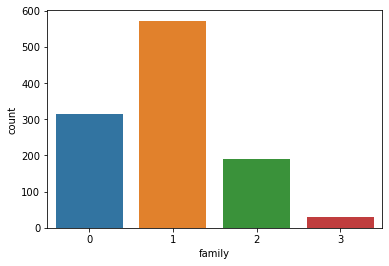

In [46]:
sns.countplot(x = df1['family'])

# 시각화

<AxesSubplot:xlabel='Reaction', ylabel='count'>

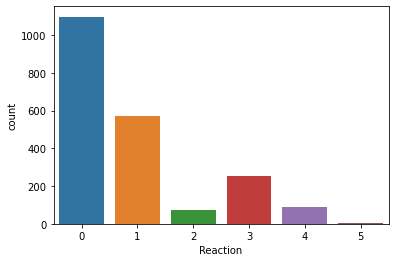

In [48]:
# education
sns.countplot(x = 'Education',data = df1)   # Graduation >>phd > master> 2ncycle(고등학교)> basic
# kidhome
#sns.countplot(x = 'Kidhome',data = df1)  #  0 >1> 2 
# teenhome
#sns.countplot(x = 'Teenhome',data =df1) # 0>1>>2
# complain
sns.countplot(x = 'Complain',data = df1)  # 0 (1000),1 (600)이 있네 
# Reaction
sns.countplot(x = 'Reaction',data = df1)  # 0>1>3>4>2>5

In [49]:
# Marital_Status
#sns.countplot(x = 'Marital_Status',data = df1)  # marr>together>single>divorce>widow
# NumDealPurchases
#sns.countplot(x = 'NumDealsPurchases',data = df1)  # 1>2> .....6> 7=0>8> ...15
# NumWebPurchases
#sns.countplot(x ='NumWebPurchases',data = df1)  # 11까지 올라가다가 26,27이 생기네 
# NumCatalogPurchases
#sns.countplot(x ='NumCatalogPurchases',data = df1)  # 이건 0에서 11까지 
# NumStorePurchases
#sns.countplot(x ='NumStorePurchases',data = df1)  # 13까지
# NumWebVisitsMonth
#sns.countplot(x ='NumWebVisitsMonth',data = df1) # ~ 10 ,13,14,19,20

<AxesSubplot:xlabel='age'>

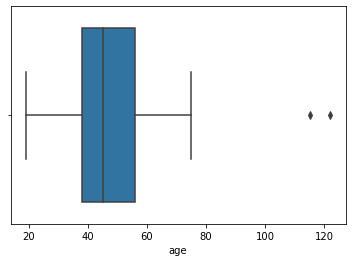

In [50]:
# target
#sns.boxplot(x = 'target',data = df1)
# Recency
#sns.boxplot(x = 'Recency',data = df1) 
#income
#sns.boxplot(x = 'Income',data = df1) # 이상치 존재 
# age
sns.boxplot(x = 'age',data = df1) # 이상치 존재 이상치 제거(?)

<AxesSubplot:xlabel='Recency'>

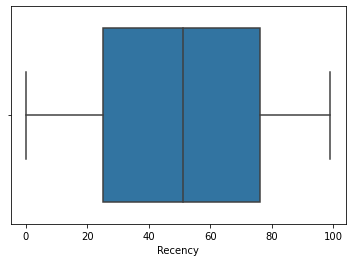

In [51]:
sns.boxplot(x = df1['Recency'])

In [52]:
df1[df1['age']>100] # 120살 이상 확인

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Response,target,year,month,day,age,home,Reaction,degree,family
760,760,2n Cycle,Divorced,36640,1,0,99,1,2,1,...,0,65,2013,09,26,115,0,0,2,1
865,865,2n Cycle,Single,60182,0,1,23,1,1,0,...,0,22,2014,05,17,122,0,0,2,1


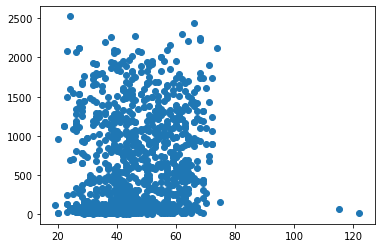

In [53]:
plt.scatter(x = 'age', y ='target', data = df1)

In [54]:
df1[df1['Income']>140000]

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Response,target,year,month,day,age,home,Reaction,degree,family
246,246,PhD,Together,162397,1,1,31,0,0,0,...,0,107,2013,06,03,39,1,0,5,2
686,686,Graduation,Divorced,153924,0,0,81,0,0,0,...,0,6,2014,02,07,40,0,0,3,0
730,730,Master,Together,157733,1,0,37,0,1,0,...,0,59,2013,06,04,44,1,0,4,1


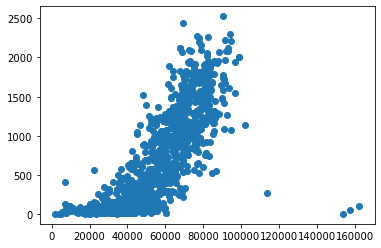

In [55]:
plt.scatter(x = 'Income', y ='target', data = df1)

### 그림으로 보아 이상치 제거 나이가 많은 사람 , 수입이 많은 사람 3명 제거 

In [56]:
df1.drop(index = [865,760,246,686,730],inplace =True)

In [57]:
df1

,id,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Response,target,year,month,day,age,home,Reaction,degree,family
0,0,Master,Together,46014,1,1,21,10,7,1,...,0,541,2013,01,21,41,1,0,4,2
1,1,Graduation,Single,76624,0,1,68,1,5,10,...,0,899,2014,05,24,53,0,1,3,1
2,2,Graduation,Married,75903,0,1,50,2,6,6,...,0,901,2013,04,08,64,1,0,3,1
3,3,Basic,Married,18393,1,0,2,2,3,0,...,0,50,2014,03,29,41,1,0,1,1
4,4,PhD,Together,64014,2,1,56,7,8,2,...,0,444,2014,06,10,69,1,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1103,Graduation,Together,46097,0,1,11,5,3,1,...,0,241,2013,03,31,59,1,0,3,1
1104,1104,Graduation,Married,23477,1,0,39,3,3,0,...,0,147,2013,10,21,29,1,0,3,1
1105,1105,Master,Married,37368,1,0,4,1,1,0,...,0,30,2013,12,16,40,1,1,4,1
1106,1106,Graduation,Divorced,53034,1,1,30,8,6,1,...,0,447,2013,05,30,41,0,0,3,2


<AxesSubplot:xlabel='target', ylabel='Density'>

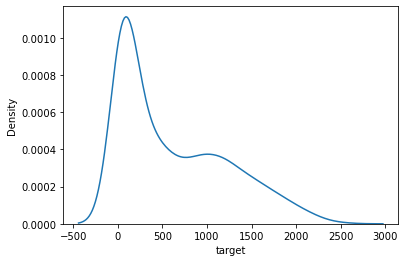

In [58]:
sns.kdeplot(df1['target']) # 포아송 분포 

In [59]:
df['target']

0       541
1       899
2       901
3        50
4       444
       ... 
1103    241
1104    147
1105     30
1106    447
1107    302
Name: target, Length: 1108, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Density'>

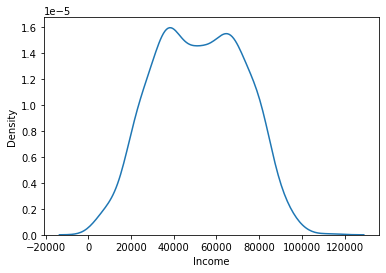

In [60]:
sns.kdeplot(df1['Income'])

In [61]:
df_object = df1[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Reaction']]

In [62]:
df_num = df1[['Income','Recency','age']]

<AxesSubplot:>

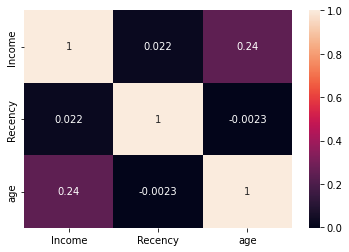

In [63]:
df_num_corr = df_num.corr(method = 'pearson')
sns.heatmap(df_num_corr,annot = True)

In [4]:
# 숫자끼리 상관성을 파악

<AxesSubplot:>

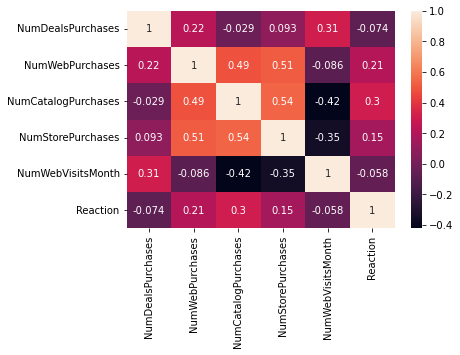

In [64]:
customer_corr = df_object.corr(method = 'kendall')  # kendall : 동일한게 몇인지  spearman : 12345 로 나누는거 둘다 순위형
sns.heatmap(customer_corr,annot = True)  

In [5]:
# 문자끼리 상관성 파악

<AxesSubplot:xlabel='Reaction', ylabel='count'>

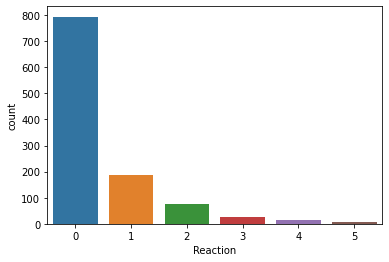

In [65]:
sns.countplot(x = df1['Reaction'])

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1107
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1102 non-null   int64 
 1   Education            1102 non-null   object
 2   Marital_Status       1102 non-null   object
 3   Income               1102 non-null   int64 
 4   Kidhome              1102 non-null   int64 
 5   Teenhome             1102 non-null   int64 
 6   Recency              1102 non-null   int64 
 7   NumDealsPurchases    1102 non-null   int64 
 8   NumWebPurchases      1102 non-null   int64 
 9   NumCatalogPurchases  1102 non-null   int64 
 10  NumStorePurchases    1102 non-null   int64 
 11  NumWebVisitsMonth    1102 non-null   int64 
 12  AcceptedCmp3         1102 non-null   int64 
 13  AcceptedCmp4         1102 non-null   int64 
 14  AcceptedCmp5         1102 non-null   int64 
 15  AcceptedCmp1         1102 non-null   int64 
 16  Accept

In [67]:
df1['degree'] = df1['degree'].astype('int')
df1['home'] = df1['home'].astype('int')

In [68]:
df2 = df1.copy()

In [69]:
df2 = df2.drop(['id','Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','year','day','month'],axis = 1)

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1107
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Income               1102 non-null   int64
 1   Recency              1102 non-null   int64
 2   NumDealsPurchases    1102 non-null   int64
 3   NumWebPurchases      1102 non-null   int64
 4   NumCatalogPurchases  1102 non-null   int64
 5   NumStorePurchases    1102 non-null   int64
 6   NumWebVisitsMonth    1102 non-null   int64
 7   Complain             1102 non-null   int64
 8   target               1102 non-null   int64
 9   age                  1102 non-null   int64
 10  home                 1102 non-null   int32
 11  Reaction             1102 non-null   int64
 12  degree               1102 non-null   int32
 13  family               1102 non-null   int64
dtypes: int32(2), int64(12)
memory usage: 152.8 KB


In [7]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Poisson
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import random


# train- test

In [72]:
X = df2.drop(['target'],axis = 1)
Y = df2['target']

In [73]:
X_array = np.array(X)
Y_array = np.array(Y)

In [74]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [8]:
random.seed(1) # 랜덤 seed을 고정을 하여 값이 달라지는 것을 방지

In [76]:
lr = LinearRegression()  # 0.29, 0.006
ridge = Ridge() # 0.29 0.017
lasso = Lasso() # 0.29
# 큰 차이가 없음

In [77]:
kfold = KFold(n_splits=5, shuffle=True)
cv_accuracy = []
n_iter = 0
for train_index, test_index in kfold.split(X_array):  # X 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(NMAE(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 NMAE:', np.mean(cv_accuracy))
print('\n## 표준편차:', np.std(cv_accuracy))


#1 교차 검증 정확도 : 0.3017,  학습 데이터 크기 : 881,  검증 데이터 크기 : 221
#1 검증 세트 인덱스 : [   2   11   13   18   20   22   29   30   32   34   38   40   47   48
   51   53   54   59   71   80   92   95  104  106  107  108  117  125
  127  143  144  146  148  149  160  162  163  169  172  177  178  179
  180  181  186  187  188  192  194  201  204  206  213  214  222  231
  235  237  239  248  251  259  264  265  272  278  282  284  292  294
  298  304  313  316  317  323  325  334  337  340  342  345  351  354
  358  362  367  369  378  379  380  381  385  387  389  390  403  410
  412  416  420  429  448  451  456  462  464  480  481  482  497  501
  515  517  522  528  535  538  544  558  563  566  574  579  582  585
  591  592  595  597  598  599  603  605  607  609  610  621  627  629
  641  643  645  663  678  679  682  693  697  706  710  717  719  728
  731  734  737  741  743  748  755  758  762  763  764  767  778  787
  789  794  800  803  812  813  814  819  822  826  832  834  843  853
  8

# XGboosting 

In [78]:
from xgboost import XGBRegressor

In [79]:
xgboo = XGBRegressor()

In [80]:
kfold = KFold(n_splits=5, shuffle=True)
cv_accuracy = []
n_iter = 0
for train_index, test_index in kfold.split(X_array):  # X 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    
    xgboo.fit(x_train, y_train)
    pred = xgboo.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(NMAE(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 NMAE:', np.mean(cv_accuracy))
print('\n## 표준편차:', np.std(cv_accuracy))


#1 교차 검증 정확도 : 0.1939,  학습 데이터 크기 : 881,  검증 데이터 크기 : 221
#1 검증 세트 인덱스 : [   4    9   12   13   14   15   23   24   27   31   32   36   40   46
   47   50   51   55   59   60   62   63   66   67   72   77   79   80
   81   92   99  101  108  113  117  118  130  134  143  145  154  155
  156  159  161  162  166  177  178  184  188  199  201  208  210  213
  214  218  228  230  239  242  255  257  259  261  264  269  277  284
  303  305  307  310  319  330  332  337  341  343  347  356  357  363
  364  373  387  389  390  397  399  400  401  404  406  407  408  417
  422  425  431  434  443  447  448  449  457  471  473  479  483  486
  489  492  497  502  508  513  514  526  529  536  537  547  560  567
  572  579  587  590  592  596  597  599  607  625  629  630  632  634
  639  640  649  654  657  659  664  678  689  690  692  693  694  696
  699  702  706  707  714  718  729  738  746  751  754  756  757  760
  768  771  794  796  799  822  828  834  843  845  853  863  865  866
  8

# RandomForest

In [81]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)

In [82]:
kfold = KFold(n_splits=5, shuffle=True)
cv_accuracy = []
n_iter = 0
for train_index, test_index in kfold.split(X_array):  # X 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(NMAE(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 NMAE:', np.mean(cv_accuracy))
print('\n## 표준편차:', np.std(cv_accuracy))


#1 교차 검증 정확도 : 0.194,  학습 데이터 크기 : 881,  검증 데이터 크기 : 221
#1 검증 세트 인덱스 : [   0    2    6   11   16   24   25   32   34   48   53   57   62   64
   70   74   86   93   98  108  112  131  137  150  152  156  157  162
  163  164  165  175  176  180  184  194  202  206  208  212  214  215
  216  220  224  229  234  239  246  248  253  259  260  266  274  275
  279  286  289  292  302  304  306  309  310  311  317  318  335  336
  340  355  356  359  361  369  378  386  394  395  397  401  405  409
  416  417  419  420  425  433  439  445  448  453  454  457  458  462
  465  486  487  488  490  491  492  493  495  499  501  505  507  513
  527  531  532  533  538  545  546  548  549  553  554  555  565  568
  570  573  590  592  596  603  611  622  625  626  635  637  652  664
  671  672  678  682  689  694  695  700  708  714  721  729  733  734
  740  746  757  760  768  776  782  785  792  794  796  799  804  820
  826  829  835  836  840  844  848  851  854  860  864  874  878  895
  90

In [83]:
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report,recall_score,precision_score

In [84]:
max_depth_grid_search = GridSearchCV(
    estimator= RandomForestRegressor(random_state=42),
    scoring=make_scorer(NMAE),
    param_grid=ParameterGrid(
        {"max_depth": [[max_depth] for max_depth in range(1, 10)]}
    ),
)

In [85]:
max_depth_grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x000001DB81239940>,
             scoring=make_scorer(NMAE))

In [86]:
max_depth_grid_search.best_params_

{'max_depth': 1}

In [101]:
X.shape[1]

13

In [102]:
feature_names = [f"X {i}" for i in range(X.shape[1])]

In [103]:
rf.feature_importances_

array([4.28594875e-01, 1.74689644e-02, 4.60163514e-03, 2.38253321e-02,
       3.75465739e-01, 7.62814103e-02, 1.75481535e-02, 4.13160927e-05,
       1.53652868e-02, 2.47667680e-03, 2.01833946e-02, 9.92665257e-03,
       8.22056317e-03])

[ 7  9  2 12 11  8  1  6 10  3  5  4  0]
[4.28594875e-01 1.74689644e-02 4.60163514e-03 2.38253321e-02
 3.75465739e-01 7.62814103e-02 1.75481535e-02 4.13160927e-05
 1.53652868e-02 2.47667680e-03 2.01833946e-02 9.92665257e-03
 8.22056317e-03]


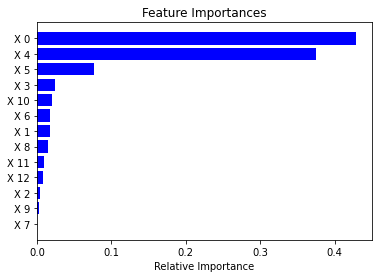

In [104]:
import numpy as np
import matplotlib.pyplot as plt


importances = rf.feature_importances_
indices = np.argsort(importances)

print(indices)
print(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [105]:
import shap

In [108]:
explainer = shap.TreeExplainer(rf)
shap_value = explainer.shap_values(x_test)

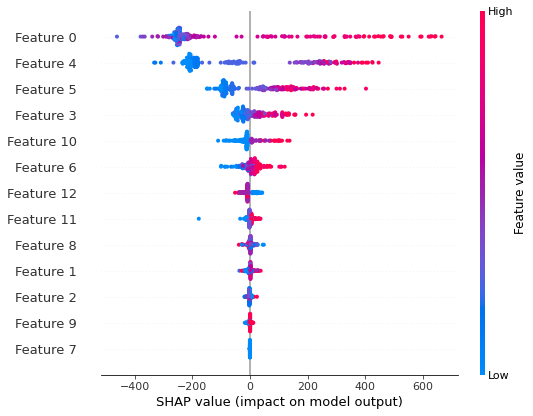

In [113]:
shap.summary_plot(shap_value, x_test)

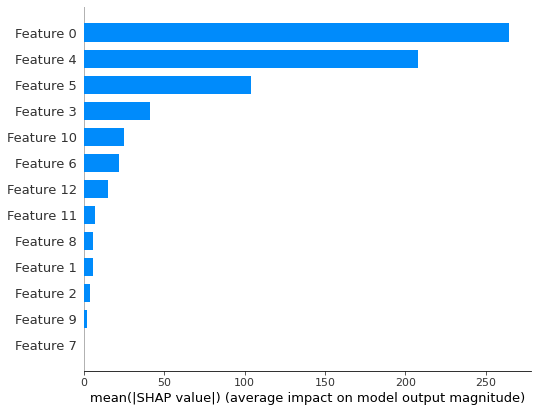

In [114]:
shap.summary_plot(shap_value, x_test,plot_type = 'bar')

shap value를 이용하여 변수들의 중요성을 파악

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# GradientBoostingRegressor

In [ ]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
cv_accuracy = []
n_iter = 0
for train_index, test_index in kfold.split(X_array):  # X 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    
    GBR.fit(x_train, y_train)
    pred = GBR.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(NMAE(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 NMAE:', np.mean(cv_accuracy))
print('\n## 표준편차:', np.std(cv_accuracy))

# SVM - SVR 사용

In [ ]:
from sklearn.svm import SVR

In [ ]:
sv = SVR(kernel = 'linear',C = 1.0, epsilon = 0.1)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
cv_accuracy = []
n_iter = 0
for train_index, test_index in kfold.split(X_array):  # X 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    
    sv.fit(x_train, y_train)
    pred = sv.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(NMAE(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 NMAE:', np.mean(cv_accuracy))
print('\n## 표준편차:', np.std(cv_accuracy))

#  제출

In [ ]:
#test = pd.read_csv('D:/data/소비에측/test.csv')

In [ ]:
#test['age'] = 2015-test['Year_Birth']

In [ ]:
#test['home'] = test['Marital_Status']

In [ ]:
#test['home'] = test['home'].apply(lambda x : x.replace('Together','1'))
#test['home'] = test['home'].apply(lambda x : x.replace('Married','1'))
#test['home'] = test['home'].apply(lambda x : x.replace('Absurd','1'))
#test['home'] = test['home'].apply(lambda x : x.replace('Single','0'))
#test['home'] = test['home'].apply(lambda x : x.replace('Alone','0'))
#test['home'] = test['home'].apply(lambda x : x.replace('YOLO','0'))
#test['home']= test['home'].apply(lambda x : x.replace('Divorced','0'))
#test['home']= test['home'].apply(lambda x : x.replace('Widow','0'))

In [ ]:
#test['Reaction'] = test['AcceptedCmp1']+test['AcceptedCmp1']+test['AcceptedCmp1']+test['AcceptedCmp1']+test['AcceptedCmp1']+test['AcceptedCmp1']+test['Response']

In [ ]:
#test['degree'] = test['Education']

In [ ]:
#test['degree'] = test['degree'].apply(lambda x : x.replace('Basic','1'))
#test['degree'] = test['degree'].apply(lambda x : x.replace('2n Cycle','2'))
#test['degree'] = test['degree'].apply(lambda x : x.replace('Graduation','3'))
#test['degree'] = test['degree'].apply(lambda x : x.replace('Master','4'))
#test['degree'] = test['degree'].apply(lambda x : x.replace('PhD','5'))

In [ ]:
#test['family'] = test['Kidhome']+ test['Teenhome']

In [ ]:
#test.columns

In [ ]:
#df2.columns

In [ ]:
#test = test.drop(['AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','Response','Year_Birth','Kidhome','Teenhome','Dt_Customer','Education','Marital_Status'],axis = 1)

In [ ]:
#test.info()

In [ ]:
#test['home'] = test['home'].astype('int')
#test['degree'] = test['degree'].astype('int')

In [ ]:
#test['Income'] = test['Income'].astype('int')

In [ ]:
#test.info()

test1 = test.drop('id',axis =1)

rf.fit(X,Y)

test['target'] = rf.predict(test1)

submission1 = test[['id','target']]

submission1

submission1.to_csv('D:/data/소비에측/submission1.csv',index = False)